## Temperature Control Lab for Python Introduction, Parts 5 and 6

The TCLab (Temperature Control Lab) has an LED, two heaters, and two temperature sensors that are controlled with an Arduino. The heater power output is adjusted to maintain a desired temperature. Thermal energy from the heater is transferred by conduction, convection, and radiation to the temperature sensor. Heat is also transferred away from the device to the surroundings. This lab is a resource to learn data analysis, visualization, regression, and model analysis in Python with real data. Temperature control is an important problem in many applications such as:

* Maintain temperature of a home during the winter
* Pre-heat an oven for baking
* Regulate the temperature in a chemical reactor
* Reduce temperature variations during semiconductor production
* Adjust the infrared heater for a newborn baby in an incubator to maintain body temperature
* Regulate natural gas to a water heater to provide consistent hot water
* Adjust flow through a heat exchanger to maintain outlet temperature
* Others?

The heaters and LED can be adjusted between 0-100% output. The dual heater effect is shown in the plot below where heat is transferred from hot to cold according to Fick's law.

![Temperature Control Lab](http://apmonitor.com/do/uploads/Main/mpc_mimo_tclab.gif "TCLab MIMO")

This Python lab is a cumulative activity that covers the following topics:

* Part 5: Thermal Conductivity Tests
* Part 6: Energy Balance for Composite Thermal Conductivity
* Part 7: Transient Energy Balance Solution

### Install TCLab and Load Packages

[Retrieve tclab.py from Github](https://github.com/APMonitor/arduino/blob/master/0_Test_Device/Python/tclab/tclab.py) if pip install is not successful such as for computers where the user does not have administrative privileges to install packages. Include tclab.py in the same directory as the Jupyter notebook.

In [20]:
# download tclab.py from 
try:
    import tclab
except:
    !pip install tclab
    import tclab

# import additional packages 
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve
from scipy.integrate import odeint
from scipy.interpolate import interp1d

### Connect Test TCLab to Computer with USB Cable

Connect the temperature control lab with the USB cable to the computer (MacOS, Windows, or Linux). Also, attach the power supply to the __top__ barrel jack as shown below. There is an [installation guide](http://apmonitor.com/pdc/index.php/Main/ArduinoSetup) if the connection is unsuccessful.

<img src=http://apmonitor.com/pdc/uploads/Main/tclab_cables.jpg width="300">

In [2]:
with tclab.TCLab() as lab:
    for i in range(5):
        lab.LED(100)        # Turn on LED (0-100%)
        time.sleep(0.5)     # Pause for 0.5 second
        lab.LED(0)          # Turn off LED
        time.sleep(0.5)     # Pause for 0.5 second
    print('T1: ' + str(lab.T1))
    print('T2: ' + str(lab.T2))    

TCLab version 0.4.6
Arduino Leonardo connected on port COM13 at 115200 baud.
TCLab Firmware Version 1.01.
T1: 24.77
T2: 23.8
TCLab disconnected successfully.


## Parts 1-4

Parts 1-4 should be completed before this lab.

Part 1 covers Python loops, files, and plotting. Part 2 covers linear, nonlinear, and nonlinear regression. A Jupyter notebook for Parts 1 and 2 is available at the following link:

[Jupyter Notebook for TCLab Parts 1 and 2](https://nbviewer.jupyter.org/url/apmonitor.com/che263/uploads/Main/TCLab_A.ipynb)

Part 3 covers interpolation and part 4 involves linear, nonlinear, and differential equation solving. A Jupyter notebook for Parts 3 and 4 is available at the following link:

[Jupyter Notebook for TCLab Parts 3 and 4](https://nbviewer.jupyter.org/url/apmonitor.com/che263/uploads/Main/TCLab_B.ipynb)

## Part 5: Thermal Conductivity

![Thermal Conductivity Test](http://apmonitor.com/che263/uploads/Main/tclab_inserts.jpg "Inserts")

### A: Material Test Data

Insert metal coins, plastic, and cardboard in between the two heaters so that there is a conduction path for heat between the two sensors. The temperature difference and temperature levels are affected by the ability of the material to conduct heat from heater 1 and temperature sensor $(T_1)$ to the other temperature sensor $(T_2)$.

Turn on heater 1 to 100% and record $T_1$, $T_2$, and the temperature difference $\Delta T = T_1-T_2$ every 10 seconds for 8 minutes for each material (6 x 8 + 1 = 49 data points). The objective is to observe the temperatures at steady state conditions and longer or shorter tests may be required to reach steady state. For each material test, record the values at the end after the system has reached a steady state equilibrium.

When changing out the materials between the heaters, wait until the heaters have cooled off and avoid touching a hot surface. There are thermochromic paint dots on the heaters that turn pink when the heaters are above 37$^oC$ (99$^oF$). Do not touch the heaters or the material between the heaters directly after the test. Blowing on the heaters helps to cool them quickly.

In [4]:
## Metal Solution
n = 49
tm_metal = np.empty(n)
t1s_metal = np.empty(n)
t2s_metal = np.empty(n)
with tclab.TCLab() as lab:
    lab.Q1(100)
    lab.Q2(0)
    st = time.time() # start time
    print('Time          T1     T2')
    for i in range(n):
        tm_metal[i] = time.time() - st
        t1s_metal[i] = lab.T1
        t2s_metal[i] = lab.T2
        print(tm_metal[i],t1s_metal[i],t2s_metal[i])
        time.sleep(10.0)
# save data
data = np.vstack((tm_metal,t1s_metal,t2s_metal))
data = data.T
np.savetxt('data_metal.txt',data)

TCLab version 0.4.6
Arduino Leonardo connected on port COM13 at 115200 baud.
TCLab Firmware Version 1.01.
Time          T1     T2
0.0 31.82 30.92
10.037814140319824 32.18 31.18
20.04082942008972 33.5 31.08
30.0521559715271 35.63 31.15
40.05996799468994 37.66 31.21
50.07200908660889 39.72 31.31
60.07489204406738 41.68 31.4
70.09493327140808 43.46 31.53
80.10489654541016 45.07 31.86
90.10567235946655 46.33 32.18
100.11882472038269 47.32 32.5
110.1299889087677 48.0 33.08
120.13701438903809 48.87 33.6
130.14815545082092 49.58 34.18
140.16779899597168 50.22 34.79
150.1707262992859 50.87 35.4
160.18121433258057 51.61 36.04
170.19368529319763 52.16 36.69
180.2052984237671 52.8 37.24
190.21425771713257 53.29 37.66
200.2213351726532 53.77 38.3
210.24023866653442 54.41 38.75
220.25344395637512 54.93 39.27
230.27475452423096 55.38 39.59
240.277925491333 55.7 40.14
250.2887988090515 56.12 40.49
260.29948472976685 56.67 40.88
270.30601501464844 56.99 41.36
280.31735014915466 57.31 41.75
290.3428797

In [5]:
## Plastic Solution
n = 49
tm_pltc = np.empty(n)
t1s_pltc = np.empty(n)
t2s_pltc = np.empty(n)
with tclab.TCLab() as lab:
    lab.Q1(100)
    lab.Q2(0)
    st = time.time() # start time
    print('Time          T1     T2')
    for i in range(n):
        tm_pltc[i] = time.time() - st
        t1s_pltc[i] = lab.T1
        t2s_pltc[i] = lab.T2
        print(tm_pltc[i],t1s_pltc[i],t2s_pltc[i])
        time.sleep(10.0)
# save data
data = np.vstack((tm_pltc,t1s_pltc,t2s_pltc))
data = data.T
np.savetxt('data_pltc.txt',data)

TCLab version 0.4.6
Arduino Leonardo connected on port COM13 at 115200 baud.
TCLab Firmware Version 1.01.
Time          T1     T2
0.0010013580322265625 34.98 33.98
10.01342225074768 35.08 33.79
20.02395272254944 36.37 33.63
30.034307956695557 38.01 33.47
40.03878092765808 39.94 33.43
50.05247521400452 41.85 33.43
60.07111573219299 43.68 33.47
70.07265830039978 45.39 33.76
80.07460618019104 46.78 33.98
90.08197712898254 48.29 34.11
100.10743117332458 49.71 34.43
110.1093864440918 51.03 34.76
120.13320136070251 52.16 35.01
130.1349425315857 53.19 35.21
140.14146637916565 54.38 35.4
150.15634512901306 55.35 35.72
160.1593599319458 56.25 36.01
170.16999912261963 56.99 36.37
180.1881022453308 57.7 36.69
190.19682359695435 58.47 37.01
200.2060558795929 59.12 37.3
210.2089500427246 59.57 37.62
220.2312331199646 60.21 37.91
230.23218989372253 60.86 38.17
240.25230026245117 61.21 38.3
250.25384664535522 61.67 38.62
260.264853477478 62.15 38.82
270.27981209754944 62.47 38.95
280.280312538147 62.

In [6]:
## Cardboard Solution
n = 49
tm_card = np.empty(n)
t1s_card = np.empty(n)
t2s_card = np.empty(n)
with tclab.TCLab() as lab:
    lab.Q1(100)
    lab.Q2(0)
    st = time.time() # start time
    print('Time          T1     T2')
    for i in range(n):
        tm_card[i] = time.time() - st
        t1s_card[i] = lab.T1
        t2s_card[i] = lab.T2
        print(tm_card[i],t1s_card[i],t2s_card[i])
        time.sleep(10.0)
# save data
data = np.vstack((tm_card,t1s_card,t2s_card))
data = data.T
np.savetxt('data_card.txt',data)

TCLab version 0.4.6
Arduino Leonardo connected on port COM13 at 115200 baud.
TCLab Firmware Version 1.01.
Time          T1     T2
0.0 48.61 40.88
10.018586158752441 47.97 40.23
20.03188967704773 48.29 39.91
30.054570198059082 49.26 39.59
40.06185579299927 50.39 39.14
50.076008796691895 51.51 38.95
60.09345006942749 52.71 38.62
70.10711693763733 53.77 38.62
80.10871744155884 54.87 38.3
90.11069750785828 55.93 38.27
100.11127185821533 56.99 38.3
110.11691617965698 57.7 38.08
120.12048125267029 58.6 38.14
130.148211479187 59.25 38.04
140.17378759384155 60.18 38.3
150.17989110946655 60.86 38.3
160.1958544254303 61.47 38.3
170.19614481925964 61.92 38.49
180.2192027568817 62.47 38.62
190.23252964019775 63.08 38.62
200.23582935333252 63.44 38.62
210.24589681625366 63.76 38.85
220.26262044906616 64.21 38.95
230.28588581085205 64.63 38.98
240.29321098327637 64.86 39.27
250.30090403556824 65.27 39.27
260.31726455688477 65.6 39.27
270.3205952644348 65.73 39.59
280.3316283226013 66.02 39.59
290.34

In [4]:
# retrieve data
d1 = np.loadtxt('data_card.txt')
d2 = np.loadtxt('data_pltc.txt')
d3 = np.loadtxt('data_metal.txt')

### B: Analyze Data

Locate the thermal conductivity of the materials inserted between the heaters. Below are some common materials with thermal conductivities.

| __Material__ | __Thermal Conductivity $\left(\frac{W}{m\;K}\right)$__   |
|------|------|
|   Aluminum  | 237 |
|   Cardboard / Paper  | 0.05 |
|   Copper (US Penny <1981) | 401 |
|   Gold | 318 |
|   Plastic (LDPE) | 0.36 |
|   Silver | 429 |
|   Stainless Steel | 18 |
|   Steel (<0.5% Carbon) | 54 |
|   Zinc (US Penny >1983) | 116 |

Create a semi-log x plot of the thermal conductivity versus $T_1$, $T_2$, and $\Delta T$ using an average of the last 6 data points for each of the plastic, metal, and cardboard tests. Use __plt.semilogx__ to create the plot with thermal conductivity as the first argument and the temperatures as the second argument.

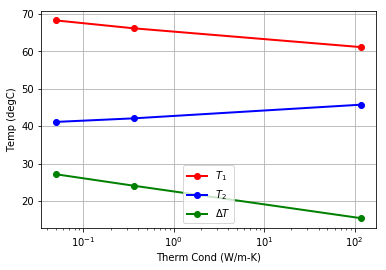

In [18]:
# paper, plastic, zinc (pennies)
k = np.array([0.05,0.36,116])
final_T1 = np.array([np.mean(d1[-7:-1,1]),\
                     np.mean(d2[-7:-1,1]),\
                     np.mean(d3[-7:-1,1])])
final_T2 = np.array([np.mean(d1[-7:-1,2]),\
                     np.mean(d2[-7:-1,2]),\
                     np.mean(d3[-7:-1,2])])
final_DT = final_T1-final_T2

plt.semilogx(k,final_T1,'r-o',linewidth=2,label=r'$T_1$')
plt.semilogx(k,final_T2,'b-o',linewidth=2,label=r'$T_2$')
plt.semilogx(k,final_DT,'g-o',linewidth=2,label=r'$\Delta T$')
plt.xlabel('Therm Cond (W/m-K)')
plt.ylabel('Temp (degC)')
plt.grid()
plt.legend(loc='best')

### C: Regression

Create a linear regression for $\log_{10}$(thermal conductivity) versus $T_1$, $T_2$, and $\Delta T$. Predict the steady state $T_1$, $T_2$, and $\Delta T$ for stainless steel using the linear model.

In [6]:
p1 = np.polyfit(np.log10(k),final_T1,1)
p2 = np.polyfit(np.log10(k),final_T2,1)
p3 = np.polyfit(np.log10(k),final_DT,1)

k_SSteel = 18.0 
print('Predicted T1: ' + str(np.polyval(p1,np.log10(k_SSteel))))
print('Predicted T2: ' + str(np.polyval(p2,np.log10(k_SSteel))))
print('Predicted DT: ' + str(np.polyval(p3,np.log10(k_SSteel))))

Predicted T1: 62.80580246993012
Predicted T2: 44.5888558424213
Predicted DT: 18.21694662750882


### D: Explain Linear Model Slope

Display the slope of each of the linear models for $\log_{10}$(thermal conductivity) versus $T_1$, $T_2$, and $\Delta T$. Based on heat transfer principles, explain the sign (positive or negative) of the slope. In other words, why does the temperature either increase or decrease with increasing thermal conductivity?

In [7]:
print('T1 slope:' + str(p1[0]))
print('T2 slope:' + str(p2[0]))
print('DT slope:' + str(p3[0]))

T1 slope:-2.0900785576105148
T2 slope:1.3860844192802833
DT slope:-3.4761629768908033


Explanation:

$T_1$ decreases with increasing $k$ because heat is more quickly conducted away from the active heater. The heater outputs a constant amount of heat. Because heat is transported away from $T_1$ to $T_2$, the temperature of $T_2$ rises. As the $T_2$ temperature rises, it expells more of the heat, thereby lowering the temperature of $T_1$. 

$T_2$ increases with increasing $k$ because the increased thermal conductivity lets more of the heat transfer from the active heater $T_1$ to sensor $T_2$.

$\Delta T$ decreases with increasing $k$ because there is less resistance to heat transfer between the two sensors. The final $DT$ will asymptotically approach a limit with increasing $k$ because conduction through the steel heat sinks becomes the limiting resistance to heat transfer. 

## Part 6: Composite Thermal Conductivity $(k_c)$

An energy balance includes energy accumulation $m \, c_p \, \frac{dT}{dt}$, energy in, and energy out. The energy balance includes conduction from $T_1$ (+energy), convection to the ambient air (-energy), and radiative heat transfer (-energy). Use the following equations for an energy balance on $T_2$. 

Conduction (Fourier's Law): $q_{cond} = -k \frac{dT}{dx} \approx -k_c \frac{T_2-T_1}{\Delta x}$

Convective Heat Transfer: $q_{conv} = h \, A \, \left(T_\infty-T_2\right)$

Radiative Heat Transfer: $q_{rad} = \sigma \, \epsilon \, A \, \left((T_\infty+273.15)^4-(T_2+273.15)^4\right)$

Energy Balance: $m \, c_p \, \frac{dT_2}{dt} = q_{cond} + q_{conv} + q_{rad}$

<img src=http://apmonitor.com/pdc/uploads/Main/tclab_heater.png width="100">

| __Parameter__ | __Value__ |
|------|------|
| Ambient Temperature $(T_\infty)$ | 23.0 $^oC$ |
| Distance Between Sensors $(\Delta x)$ | 0.015 $m$ |
| Emissivity $(\epsilon)$   | 0.9 |
| Heat Capacity $(c_p)$ | 500 $\frac{J}{kg \, K}$ |
| Convective Heat Transfer Coefficient $(h)$ | 4.05 $\frac{W}{m^2 \, K}$ |
| Mass $(m)$ | 0.004 $kg$ |
| Stefan Boltzmann Constant $(\sigma)$ | 5.67x10$^{-8}$ $\frac{W}{m^2 \, K^4}$ |
| Surface Area $(A)$ | 1.0x10$^{-3}$ $m^2$ |
| Thermal Conductivity $(k)$ | Varies with Material |

<img src=http://apmonitor.com/pdc/uploads/Main/tclab_sac.png width="400">

Heat is conducted from one sensor to the other through multiple layers of varying thermal conductivity as found in the heat sink, TIP31C transistor heater, TMP36 temperature sensor, as well as the gap between the two heat sinks (air, cardboard, plastic, metal, or something else). In addition, there are 3D aspects to the heaters that should be considered with a more rigorous analysis. A more detailed model would be required to accurately predict the resistance to conductive heat transfer without validating data.

<img src=http://apmonitor.com/pdc/uploads/Main/arduino_comsol.png width="200">

Instead of the more detailed analysis, determine a composite heat transfer coefficient $k_c$ for each material test with the steady state data points. For steady state, assume that $\frac{dT_2}{dt}=0$. Solve the energy balance equation $0 = q_{conv}+q_{cond}+q_{rad}$ for $k_c$. Evaluate $k_c$ either through algebraic rearrangement or with an equation solver such as __fsolve__.

Create a semi-log x plot of the ___composite___ thermal conductivity $(k_c)$ versus $T_1$, $T_2$, and $\Delta T$ using an average of the last 6 data points for each of the plastic, metal, and cardboard tests. Use __plt.semilogx__ to create the plot with thermal conductivity as the first argument and the temperatures as the second argument.

[9.89016478e-05 1.17624035e-04 2.21203220e-04]


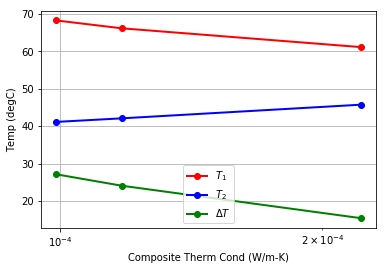

In [32]:
Tinf = 23.0
dx = 0.015
eps = 0.9
cp = 500
m = 0.004
sigma = 5.67e-8
A = 1e-3
h = 4.05

kc = np.empty(3)
for i in range(3):
    rad = eps * sigma * A * (((Tinf+273.15)**4)-(final_T2[i]+273.15)**4)
    conv = h * A * (Tinf-final_T2[i])

    # 0 = conv + rad + cond
    #cond = -kc[i] * (final_T2[i]-final_T1[i])/dx
    # solve for kc[i]
    kc[i] = (rad + conv) * dx / (final_T2[i]-final_T1[i])
    
print(kc)

plt.semilogx(kc,final_T1,'r-o',linewidth=2,label=r'$T_1$')
plt.semilogx(kc,final_T2,'b-o',linewidth=2,label=r'$T_2$')
plt.semilogx(kc,final_DT,'g-o',linewidth=2,label=r'$\Delta T$')
plt.xlabel('Composite Therm Cond (W/m-K)')
plt.ylabel('Temp (degC)')
plt.grid()
plt.legend(loc='best')

## Part 7: Transient Energy Balance

Use the composite thermal conductivity $k_c$ from the prior problem to solve the transient energy balance as an ordinary differential equation (ODE).

Conduction (Fourier's Law): $q_{cond} = -k \frac{dT}{dx} \approx -k_c \frac{T_2-T_1}{\Delta x}$

Convective Heat Transfer: $q_{conv} = h \, A \, \left(T_\infty-T_2\right)$

Radiative Heat Transfer: $q_{rad} = \sigma \, \epsilon \, A \, \left((T_\infty+273.15)^4-(T_2+273.15)^4\right)$

Energy Balance: $m \, c_p \, \frac{dT_2}{dt} = q_{cond} + q_{conv} + q_{rad}$

The initial condition is the initial temperature of $T_2$. Show the ODE solution for $T_2$ with data for each of the 3 cases (cardboard, plastic, and metal). Plot the measured temperatures and predicted temperatures for each case in a separate subplot. Add appropriate labels to the plot.

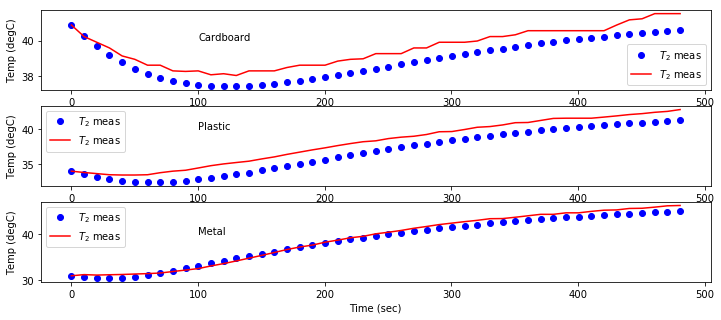

In [31]:
td = d1[:,0]
i1 = interp1d(t,d1[:,1])
i2 = interp1d(t,d2[:,1])
i3 = interp1d(t,d3[:,1])

def f(x,t):
    # m cp dT/dt = conv + rad + cond
    dTdt = np.empty(3)
    for i in range(3):
        if i==0:
            T1 = i1
        elif i==1:
            T1 = i2
        else:
            T1 = i3
        # protect for extrapolation
        ti = max(np.min(td),t)
        ti = min(np.max(td),ti)
        rad = eps * sigma * A * (((Tinf+273.15)**4)-(x[i]+273.15)**4)
        conv = h * A * (Tinf-x[i])
        cond = -kc[i] * (x[i]-T1(ti))/dx
        dTdt[i] = (conv+rad+cond) / (m*cp)
    return dTdt

x0 = [d1[0,2],d2[0,2],d3[0,2]]
T2pred = odeint(f,x0,td)

plt.figure(figsize=(12,5))
#plt.plot(t,d1[:,1],'k--',linewidth=3,label='$T_1$')
plt.subplot(3,1,1)
plt.plot(t,T2pred[:,0],'bo',label=r'$T_2$ meas')
plt.plot(t,d1[:,2],'r-',label=r'$T_2$ meas')
plt.text(100,40,'Cardboard')
plt.ylabel('Temp (degC)')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,T2pred[:,1],'bo',label=r'$T_2$ meas')
plt.plot(t,d2[:,2],'r-',label=r'$T_2$ meas')
plt.text(100,40,'Plastic')
plt.ylabel('Temp (degC)')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,T2pred[:,2],'bo',label=r'$T_2$ meas')
plt.plot(t,d3[:,2],'r-',label=r'$T_2$ meas')
plt.text(100,40,'Metal')
plt.xlabel('Time (sec)')
plt.ylabel('Temp (degC)')
plt.legend()